# TE Image processing

Import the necessary modules and activate inline plotting.

In [185]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [186]:
import mahotas
import imutils

Define two functions for displaying images and plotting histograms.

In [187]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')
    # place the x-axis labels at the top
    plt.tick_params(bottom=False, top=True, labelbottom=False, labeltop=True)

In [188]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(300, 300, 3)


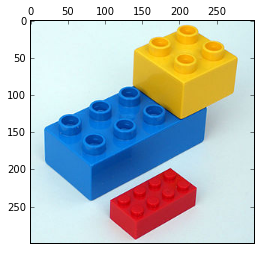

In [189]:
img = cv2.imread("bricks.jpg")
print(img.shape)
show(img)

What is the BGR value of pixle at position p0 = (100, 200)?

In [190]:
(b,g,r)=img[200,100]
print("p0-R:{},G:{},B:{}".format(r,g,b))

p0-R:4,G:66,B:149


Make a copy of `img` and add a red circle of with center=p0, radius=20, and thickness=2.

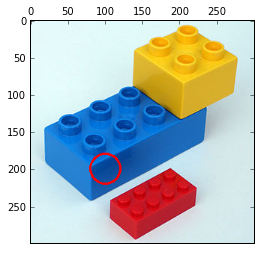

In [191]:
img2 = img.copy()
cv2.circle(img2,(100,200),20,(0,0,255),2)
show(img2)

## 7 Histograms

Transform the color image to a gray-scale image and show it.

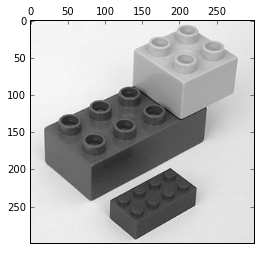

In [192]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a false-color image to better read the gray-scale values.

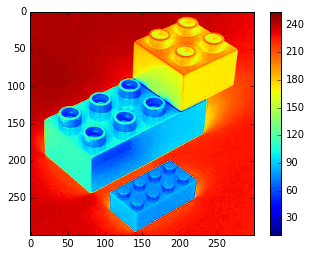

In [193]:
plot = plt.imshow(gray)
plt.colorbar();

Create a histogramm for the grayscale image `gray`.

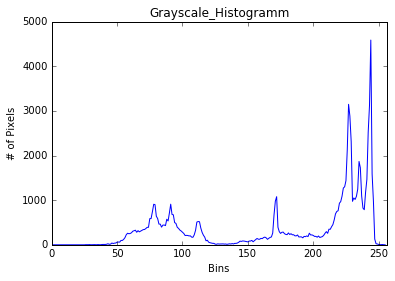

In [194]:
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
histogram(hist,"Grayscale_Histogramm")


Look at the false-color grayscale image and explain the seven peaks at 
- 75
- 90
- 110
- 170
- 220
- 230
- 240

75:le plus petit lego

90:le plus grand lego face sombre

110:le plus grand lego face claire

170:faces latérales du lego moyen

220:face supérieur du lego moyen

230:ombres des lego

240:arrière-plan

## Split into RGB colors

Split the image into its 3 color components (b, g, r). Show b.

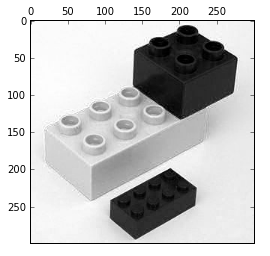

In [195]:
(b, g, r) = cv2.split(img)
show(b)

Horizontally stack the 3 images (b, g, r) and call the result `bgr`.

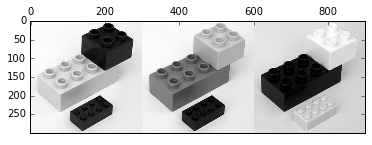

In [196]:
stacked=np.hstack([b,g,r])
show(stacked)

Create a zero-filled np.array `z` whith the same dimensions as `gray`. Use it to create a 
- blue imgage B from b
- green image G from g
- red image R from r

Horizontally stack the (B, G, R) images and call the result `BGR`.

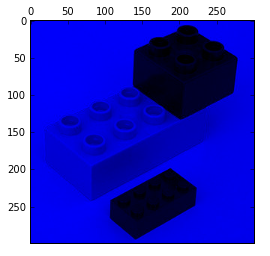

In [197]:
z=np.zeros((img.shape[1],img.shape[0],1),dtype="uint8")
B=cv2.merge([b, z, z])
show(B)

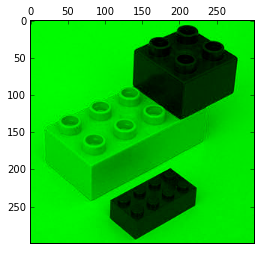

In [198]:
G=cv2.merge([z, b, z])
show(G)

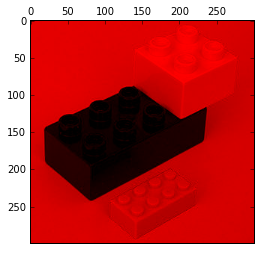

In [199]:
R=cv2.merge([z, z, r])
show(R)

## 8 Smoothing

Extract a 80x80 region at point (100, 80) and call it `img2`

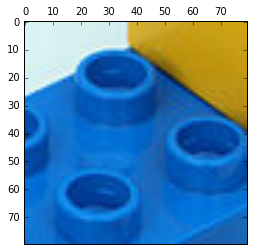

In [200]:
img2=img[80:160,100:180]
show(img2)

Show 3 horizontally stacked Gaussian blurred images of `img2` with a blur size of 3, 5, 7

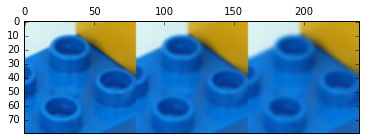

In [201]:
img2s=np.hstack([cv2.GaussianBlur(img2,(3,3),0),cv2.GaussianBlur(img2,(5,5),0),cv2.GaussianBlur(img2,(7,7),0)])
show(img2s)

## 9 Thresholding

Use the blue component `b` of the image and compute the inverse binary with a simple threshold of T=100, to obtain a mask which only shows the `yellow` and the red brick.

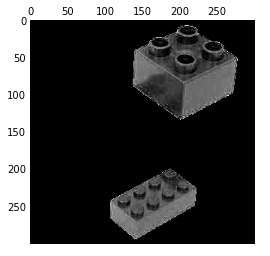

In [202]:
(T,thresh)=cv2.threshold(b,100,255,cv2.THRESH_BINARY_INV)
masked = cv2.bitwise_and(b, b, mask = thresh)
show(masked)

Use `bitwise_and` to show only the red and yellow brick.

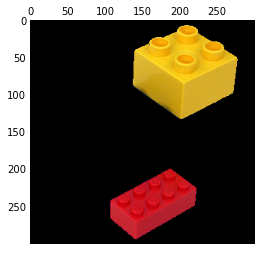

In [203]:
maskedc=cv2.bitwise_and(img, img, mask = thresh)
show(maskedc)

## 10 Edge detection

The blue color component `b` has the higest image contrast. So we use this image for edge detection of the yellow and red brick.

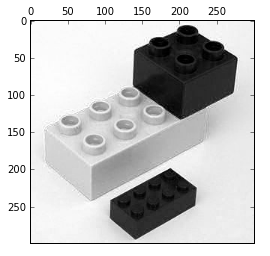

In [204]:
show(b)

Blur the grayscale image `b` by an appropriate amount, then use Canny edge detection to extract the contours of the red and yellow brick.

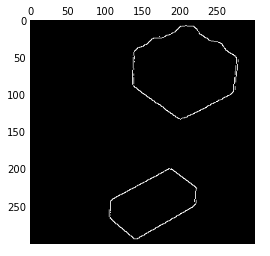

In [206]:
blur = cv2.blur(b, (5, 5))
canny = cv2.Canny(blur, 200, 250)
show(canny)